In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE

import util.df_enricher as jn
import util.jndb as db

In [3]:
ratings = jn.get_enriched_card_ratings()

In [121]:
type_ratings = ratings[ratings.card_type == 'fib']
type_ratings = type_ratings[type_ratings.attempt_num > 2]
X = type_ratings[['subject_num','difficulty_level','time_spent','attempt_num', 'gap_duration', 'prior_le']]
Y = type_ratings['is_correct']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

smote = SMOTE()
X_train_os, y_train_os = smote.fit_resample( X_train, y_train )

In [123]:
X_train.shape

(16947, 6)

In [124]:
X_train_os.shape

(31272, 6)

In [125]:
y_train_os.shape

(31272,)

In [126]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg_os = LogisticRegression()
logreg_os.fit(X_train_os, y_train_os)

LogisticRegression()

In [127]:
y_pred = logreg.predict( X_test )
y_pred_os = logreg_os.predict( X_test )

In [182]:
c_mat = confusion_matrix(y_test, y_pred, labels=[0,1])
print( 'Confusion matrix' )
print(c_mat)

c_mat_os = confusion_matrix(y_test, y_pred_os,labels=[0,1])
print( 'Confusion matrix with oversampling' )
print(c_mat_os)

Confusion matrix
[[ 121  511]
 [  67 6564]]
Confusion matrix with oversampling
[[ 480  152]
 [1056 5575]]


In [191]:
optimal_threshold = 0.65
lr = logreg_os

y_prob = lr.predict_proba( X_test )
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
y_pred_1 = [ (1 if prob[1] >= optimal_threshold else 0) for prob in y_prob ]

c_mat_1 = confusion_matrix(y_test, y_pred_1,labels=[0,1])
acc_neg = c_mat_1[0][0]/(c_mat_1[0].sum())
acc_pos = c_mat_1[1][1]/(c_mat_1[1].sum())

print( f'Accuracy of predicting wrong = {acc_neg}' )
print( f'Accuracy of predicting right = {acc_pos}' )
print( c_mat_1 )

Accuracy of predicting wrong = 0.8734177215189873
Accuracy of predicting right = 0.7265872417433268
[[ 552   80]
 [1813 4818]]


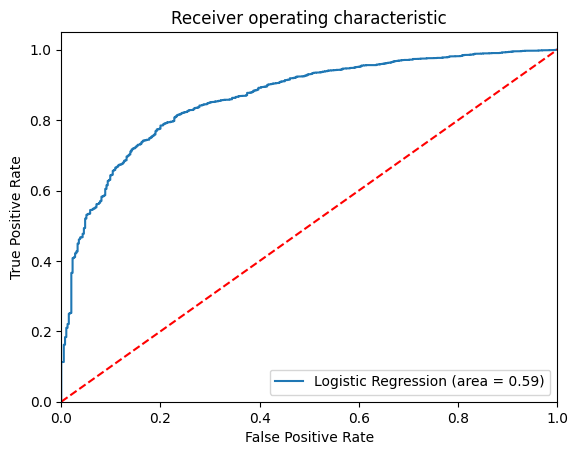

inf, 0.0, 1.0
0.9980287275750631, 0.00022527596305474206, 1.0
0.9841217419565913, 0.10407749493129083, 1.0
0.9841030255463188, 0.10452804685740032, 1.0
0.9837237453792105, 0.11286325749042578, 1.0
0.9836990125958636, 0.11286325749042578, 0.9949367088607595
0.9821374103624363, 0.1356161297589547, 0.9949367088607595
0.9821338876884617, 0.1360666816850642, 0.9949367088607595
0.9805283257634965, 0.16197341743635954, 0.9949367088607595
0.9805120467102463, 0.16197341743635954, 0.9924050632911392
0.9794847522036074, 0.18359990988961478, 0.9924050632911392
0.9794630906931149, 0.18359990988961478, 0.9898734177215189
0.9793957864721404, 0.184275737778779, 0.9898734177215189
0.979388979977175, 0.1847262897048885, 0.9898734177215189
0.97816101147672, 0.2099571975670196, 0.9898734177215189
0.9781558037950324, 0.2099571975670196, 0.9873417721518988
0.9776942942281155, 0.22077044379364721, 0.9873417721518988
0.9776653167032838, 0.22077044379364721, 0.9848101265822785
0.9764164720127269, 0.25028159495

In [68]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

for i in range(len(fpr)):
    print( f'{thresholds[i]}, {tpr[i]}, {1-fpr[i]}' )